### Random Forest 

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pandas as pd
import numpy as np
import shap
import lime
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\X_train.csv")
X_test = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\X_test.csv")
Y_train = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\Y_train.csv")
Y_test = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\Y_test.csv")

In [3]:

# Convert DataFrame inputs to NumPy arrays
X_train_arr = X_train.values
X_test_arr = X_test.values
Y_train_arr = Y_train.values
Y_test_arr = Y_test.values


regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
regressor.fit(X_train, Y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(random_state=42)

In [4]:
# Predict the values of the testing data
y_pred = regressor.predict(X_test)

In [5]:
# Calculate the mean squared error of the model on the testing data
mse = mean_squared_error(Y_test, y_pred)

# Print the mean squared error
print("Mean squared error:", mse) 

Mean squared error: 0.00011489908476904743


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


KeyboardInterrupt: 

In [6]:
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

#print("Mean absolute error:", mae)
print("Root Mean squared error:", rmse)

mae = mean_absolute_error(Y_test, y_pred)
print("Mean absolute error:", mae)

Root Mean squared error: 0.010719099065175553
Mean absolute error: 0.006327466229289321


Index(['V', 'I', 'T', 'V_avg', 'I_avg'], dtype='object')

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


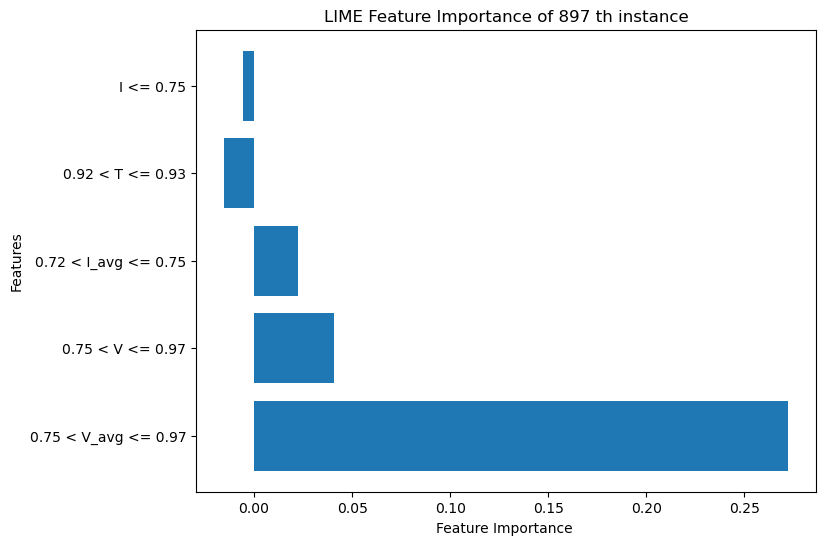

In [11]:
import numpy as np

random_instance_idx = 897

# LIME explanation
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_arr, mode='regression', feature_names=['V', 'I', 'T', 'V_avg', 'I_avg'])
lime_explanation = explainer.explain_instance(X_test_arr[random_instance_idx], regressor.predict, num_features=5)

# Plot the LIME explanation
#lime_explanation.as_pyplot_figure()
#plt.show()

# Get the feature importance and visualize the results
lime_feature_importance = lime_explanation.as_list()
lime_feature_names = [f[0] for f in lime_feature_importance]
lime_feature_values = [f[1] for f in lime_feature_importance]

# Plot the LIME feature importance
plt.figure(figsize=(8, 6))
plt.barh(lime_feature_names, lime_feature_values)
plt.xlabel('Feature Importance ')
plt.ylabel('Features')
plt.title('LIME Feature Importance of {} th instance'.format(random_instance_idx))
plt.show()

In [18]:
importances = regressor.feature_importances_

# Iterate over the importances and print them
for feature, importance in zip(X_train.columns, importances):
    print(feature, importance)

V 0.006593389265749726
I 0.0007856473484463726
T 0.017084646175292602
V_avg 0.9463793801812648
I_avg 0.029156937029246387


In [13]:
# SHAP explanation
#explainer = shap.Explainer(regressor)
#shap_values = explainer(X_test_arr.iloc[[0:10]])

# Plot the SHAP summary plot
#shap.summary_plot(shap_values, X_test_arr, feature_names=['V', 'I', 'T', 'V_avg', 'I_avg'])

# Create an explainer object with the trained model and feature names
explainer = shap.Explainer(regressor, feature_names=['V', 'I', 'T', 'V_avg', 'I_avg'])

# Compute SHAP values for the predictors
shap_values = explainer.shap_values(X_test.iloc[[0:]])

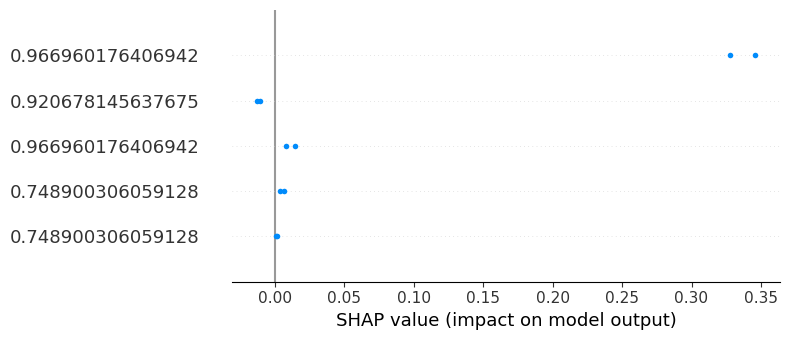

In [17]:
shap.summary_plot(shap_values, X_test.iloc[0])

In [9]:
y_pred.shape

(47517,)

In [10]:
y_testt.shape 

(47517, 1)

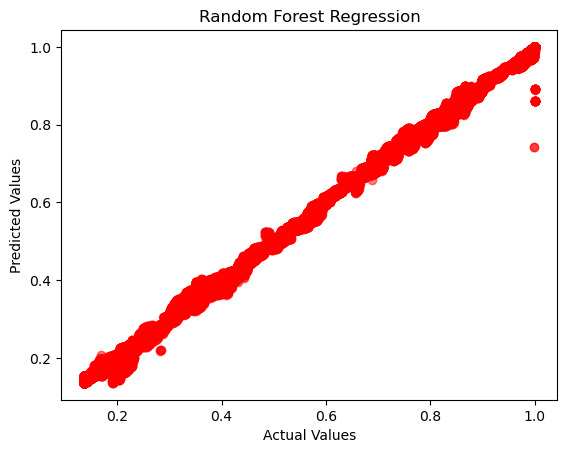

In [22]:
plt.scatter(y_testt, y_pred, alpha=0.5, color = 'red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression")
plt.show()  

In [13]:
y__pred = pd.DataFrame(y_pred)

In [18]:
y__pred.to_csv('pred.csv') 

In [17]:
y__test = pd.DataFrame(y_test)

In [19]:
y__pred.to_csv('actual.csv') 